In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('./_data/train.csv', index_col=0)
test = pd.read_csv('./_data/test.csv', index_col=0)

# 데이터 확인

In [4]:
train

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
id,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,False,False,False,1,4,3,5,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,False,False,False,True,True,False,1,3,4,1,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,False,False,False,True,False,False,2,0,3,5,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,False,False,False,True,False,False,2,0,2,5,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,True,True,True,False,False,False,1,3,4,5,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,False,False,True,False,False,1,1,2,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,True,True,False,True,False,False,1,6,2,1,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,True,True,True,True,False,False,1,7,4,1,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1


In [5]:
train.columns

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'contents_open_dt',
       'target'],
      dtype='object')

In [6]:
# from dataprep.eda import create_report
# report = create_report(train)
# report.save('dataprep_reoprt')

reporot 데이터 확인 결과 person_prefer_g, person_prefer_f의 값이 모두 1이므로 드랍

In [7]:
train.person_prefer_g.value_counts()

1    501951
Name: person_prefer_g, dtype: int64

In [8]:
train.person_prefer_f.value_counts()

1    501951
Name: person_prefer_f, dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501951 entries, 0 to 501950
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   d_l_match_yn            501951 non-null  bool  
 1   d_m_match_yn            501951 non-null  bool  
 2   d_s_match_yn            501951 non-null  bool  
 3   h_l_match_yn            501951 non-null  bool  
 4   h_m_match_yn            501951 non-null  bool  
 5   h_s_match_yn            501951 non-null  bool  
 6   person_attribute_a      501951 non-null  int64 
 7   person_attribute_a_1    501951 non-null  int64 
 8   person_attribute_b      501951 non-null  int64 
 9   person_prefer_c         501951 non-null  int64 
 10  person_prefer_d_1       501951 non-null  int64 
 11  person_prefer_d_2       501951 non-null  int64 
 12  person_prefer_d_3       501951 non-null  int64 
 13  person_prefer_e         501951 non-null  int64 
 14  person_prefer_f         501951 non-n

In [10]:
train = train.drop(columns=['person_prefer_g','person_prefer_f'])

# target에 따른 속성 값 확인

In [11]:
numerical_cols = ['person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_h_1', 
              'person_prefer_h_2', 'person_prefer_h_3','contents_attribute_l','contents_attribute_d',
              'contents_attribute_h','person_rn', 'contents_rn','contents_open_dt','target']

In [12]:
categorical_cols = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_e', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 
       'contents_attribute_m', 'contents_attribute_e']

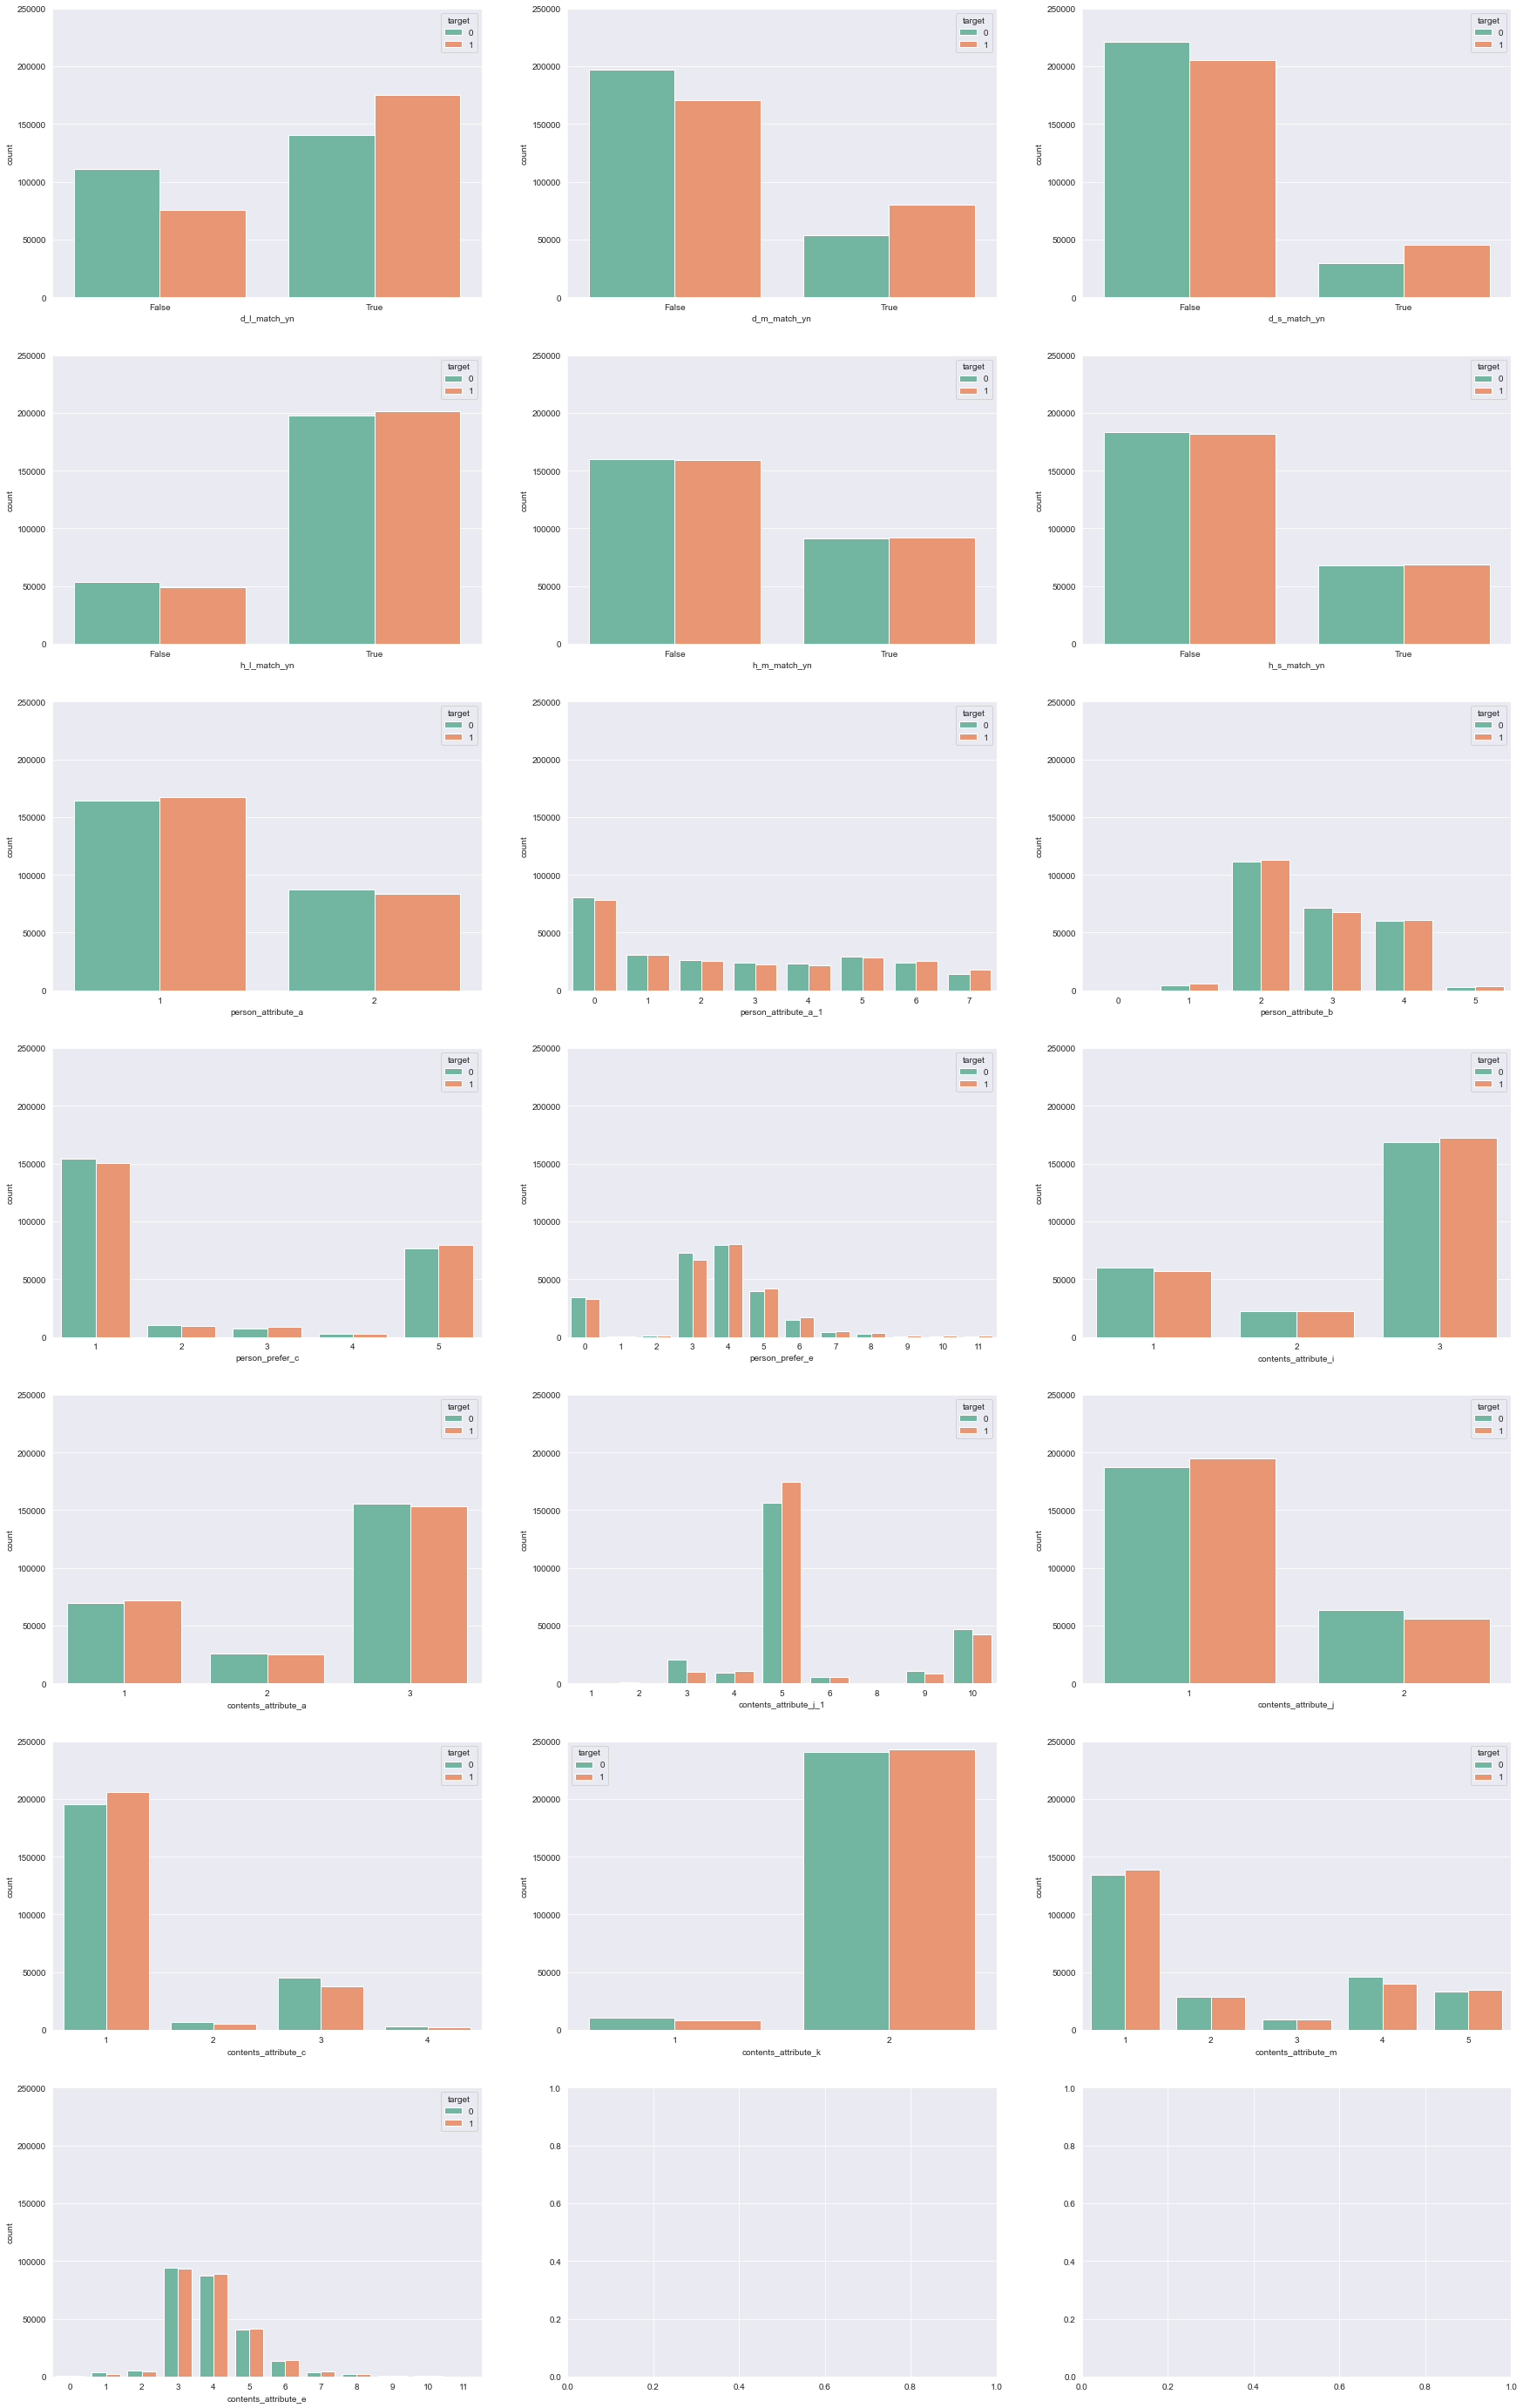

In [60]:
fig, ax = plt.subplots(nrows=7, ncols=3, figsize=(30, 50))
for i, col_name in enumerate(categorical_cols):
    sns.countplot(x=col_name, hue='target', data=train, ax=ax[i//3][i%3], palette='Set2')
    ax[i//3][i%3].set(ylim=[0,250000])
plt.show()

# 1. 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn'
* d_l_match_yn :  속성 D 대분류 매칭 여부
* d_m_match_yn :  속성 D  세분류 매칭 여부
* d_s_match_yn :  속성 D  코드 매칭 여부

In [14]:
pd.crosstab(train.d_l_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
d_l_match_yn,,,
False,110696,75987,186683
True,140410,174858,315268
All,251106,250845,501951


* d_l_match_yn=True(**속성 D 대분류가 일치할 경우**) target=1인 경우가 더 많다

In [15]:
pd.crosstab(train.d_m_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
d_m_match_yn,,,
False,197392,170932,368324
True,53714,79913,133627
All,251106,250845,501951


* 반면에 d_m_match_yn=False(**속성 D 세분류는 일치하지 않아도**) target=1인 경우가 훨씬 많다.

In [16]:
pd.crosstab(train.d_s_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
d_s_match_yn,,,
False,221306,205388,426694
True,29800,45457,75257
All,251106,250845,501951


* d_s_match_yn(속성 D  코드 매칭 여부)도 역시 False일 때 target=1인 값이 많다. 

# 2. 'h_l_match_yn','h_m_match_yn', 'h_s_match_yn',
* h_l_match_yn :  속성 H 대분류 매칭 여부
* h_m_match_yn :  속성 H 중분류 매칭 여부
* h_s_match_yn :  속성 H 코드 매칭 여부 

In [17]:
pd.crosstab(train.h_l_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
h_l_match_yn,,,
False,53255,49358,102613
True,197851,201487,399338
All,251106,250845,501951


In [18]:
pd.crosstab(train.h_m_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
h_m_match_yn,,,
False,160007,158811,318818
True,91099,92034,183133
All,251106,250845,501951


In [19]:
pd.crosstab(train.h_s_match_yn, train.target, margins=True).style.background_gradient()

target,0,1,All
h_s_match_yn,,,
False,183461,181861,365322
True,67645,68984,136629
All,251106,250845,501951


* 속성 H 역시 대분류가 일치하면 Target=1일 확률이 높고, 세분화될수록 일치하지 않아도 target=1일 가능성이 높다.

# 데이터-속성 매칭

In [19]:
d_code = pd.read_csv('./_data/속성_D_코드.csv')
h_code = pd.read_csv('./_data/속성_H_코드.csv')
l_code = pd.read_csv('./_data/속성_L_코드.csv')

In [20]:
d_code

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
0,4,4,3,2,1
1,5,5,3,2,1
2,7,7,6,2,1
3,8,8,6,2,1
4,9,8,6,2,1
...,...,...,...,...,...
1109,1254,1254,1254,1235,1235
1110,1255,1254,1254,1235,1235
1111,1256,1254,1254,1235,1235
1112,1257,1254,1254,1235,1235


In [21]:
train.person_prefer_e.unique()

array([ 8,  4,  3,  5,  6,  0,  7, 11,  9,  2,  1, 10], dtype=int64)

In [25]:
for i in h_code.columns:
    print(f'{i} min: {min(h_code[i].unique())}')
    print(f'{i} max: {max(h_code[i].unique())}')
    print(f'{i} len: {len(h_code[i].unique())}')

속성 H 코드 min: 2
속성 H 코드 max: 314
속성 H 코드 len: 294
속성 H 중분류코드 min: 315
속성 H 중분류코드 max: 570
속성 H 중분류코드 len: 256
속성 H 대분류코드 min: 1
속성 H 대분류코드 max: 314
속성 H 대분류코드 len: 21


In [26]:
for i in d_code.columns:
    print(f'{i} min: {min(d_code[i].unique())}')
    print(f'{i} max: {max(d_code[i].unique())}')
    print(f'{i} len: {len(d_code[i].unique())}')

속성 D 코드 min: 4
속성 D 코드 max: 1258
속성 D 코드 len: 1114
속성 D 세분류코드 min: 4
속성 D 세분류코드 max: 1258
속성 D 세분류코드 len: 451
속성 D 소분류코드 min: 3
속성 D 소분류코드 max: 1258
속성 D 소분류코드 len: 137
속성 D 중분류코드 min: 2
속성 D 중분류코드 max: 1258
속성 D 중분류코드 len: 36
속성 D 대분류코드 min: 1
속성 D 대분류코드 max: 1258
속성 D 대분류코드 len: 11


In [29]:
for i in l_code.columns:
    print(f'{i} min: {min(l_code[i].unique())}')
    print(f'{i} max: {max(l_code[i].unique())}')
    print(f'{i} len: {len(l_code[i].unique())}')

속성 L 코드 min: 1
속성 L 코드 max: 2025
속성 L 코드 len: 2025
속성 L 세분류코드 min: 1
속성 L 세분류코드 max: 2025
속성 L 세분류코드 len: 828
속성 L 소분류코드 min: 1
속성 L 소분류코드 max: 2025
속성 L 소분류코드 len: 332
속성 L 중분류코드 min: 1
속성 L 중분류코드 max: 2025
속성 L 중분류코드 len: 99
속성 L 대분류코드 min: 2004
속성 L 대분류코드 max: 2025
속성 L 대분류코드 len: 22


In [27]:
for i in range(1,4):
    val = f'person_prefer_d_{str(i)}'
    print(f'person_prefer_d_{i} min: {min(train[val].unique())}')
    print(f'person_prefer_d_{i} max: {max(train[val].unique())}')
    print(f'person_prefer_d_{i} len: {len(train[val].unique())}')

person_prefer_d_1 min: 4
person_prefer_d_1 max: 1258
person_prefer_d_1 len: 1093
person_prefer_d_2 min: 4
person_prefer_d_2 max: 1258
person_prefer_d_2 len: 1081
person_prefer_d_3 min: 4
person_prefer_d_3 max: 1258
person_prefer_d_3 len: 1043


In [22]:
for i in range(1,4):
    val = f'person_prefer_h_{str(i)}'
    print(f'person_prefer_h_{i} min: {min(train[val].unique())}')
    print(f'person_prefer_h_{i} max: {max(train[val].unique())}')
    print(f'person_prefer_h_{i} len: {len(train[val].unique())}')
#train.person_prefer_h_1.unique() #2~313

person_prefer_h_1 min: 2
person_prefer_h_1 max: 313
person_prefer_h_1 len: 279
person_prefer_h_2 min: 2
person_prefer_h_2 max: 313
person_prefer_h_2 len: 279
person_prefer_h_3 min: 2
person_prefer_h_3 max: 313
person_prefer_h_3 len: 279


잠시 보류 

# 1. 회원 속성 a와 컨텐츠 속성에 따른 target 값¶
## 1-1. 회원 속성 a & 컨텐츠 속성 a

In [23]:
train['contents_attribute_a'].value_counts()

3    308855
1    141895
2     51201
Name: contents_attribute_a, dtype: int64

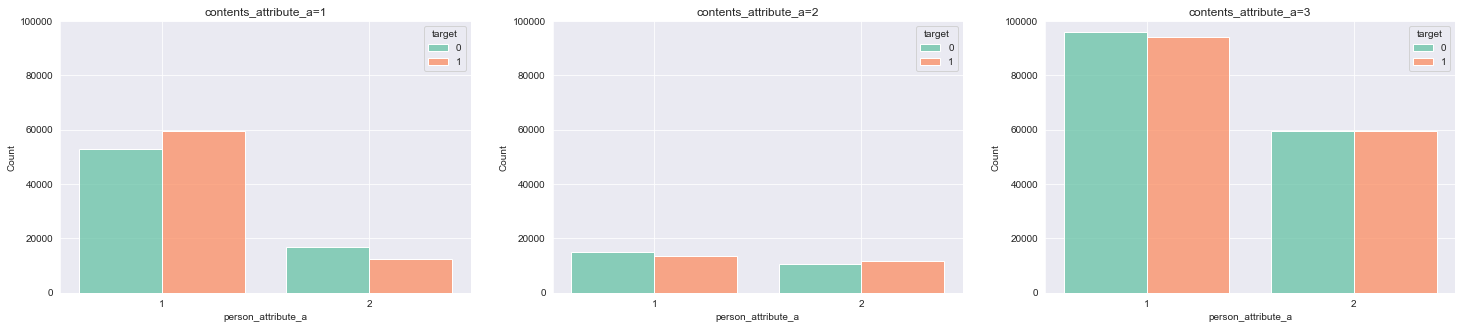

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

for i in range(3):
    sns.histplot(x ='person_attribute_a', hue='target', data = train[train['contents_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(1,len(train['person_attribute_a'].unique())+1,1), ylim=[0,100000], title=f'contents_attribute_a={i+1}')
plt.show()

* 대부분 **person_attribute_a = 1**
* person_attribute_a=1 & contents=1과 2 & 2의 target=1값이 target=0보다 조금 높은 편으로 나타남

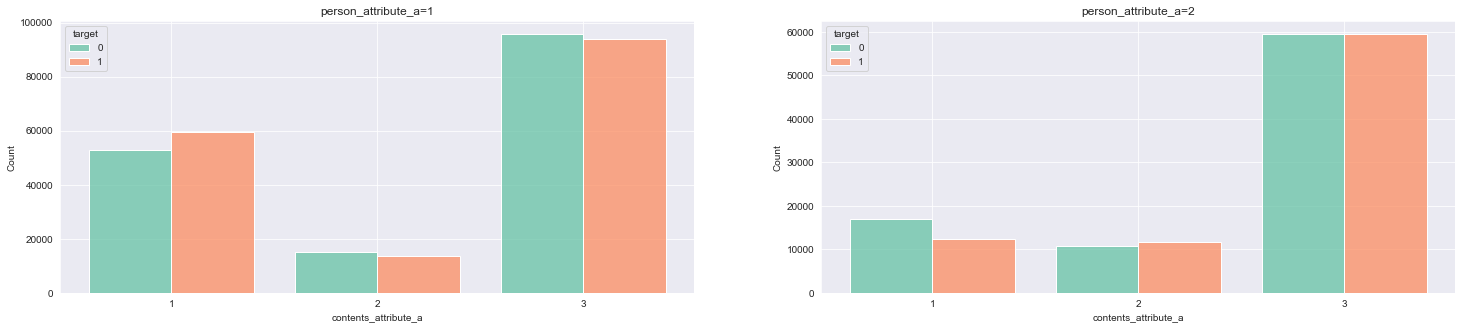

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

for i in range(2):
    sns.histplot(x ='contents_attribute_a', hue='target', data = train[train['person_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(1,len(train['contents_attribute_a'].unique())+1,1), title=f'person_attribute_a={i+1}')
plt.show()

## person_attribute_a & person_attribute_a_1

In [37]:
pd.crosstab(train.person_attribute_a_1, train.person_attribute_a, margins=True).style.background_gradient()

person_attribute_a,1,2,All
person_attribute_a_1,,,
0,9948,148678,158626
1,53643,7552,61195
2,47429,4466,51895
3,43412,2928,46340
4,42042,2283,44325
5,55225,2558,57783
6,48340,1480,49820
7,31221,746,31967
All,331260,170691,501951


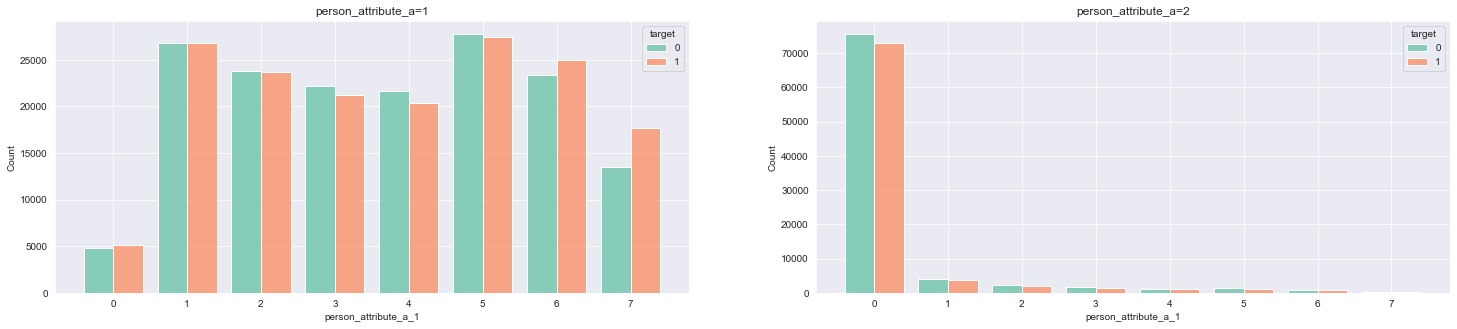

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

for i in range(2):
    sns.histplot(x ='person_attribute_a_1', hue='target', data = train[train['person_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(0,len(train['person_attribute_a_1'].unique()),1), title=f'person_attribute_a={i+1}')
plt.show()

In [38]:
pd.crosstab(train.person_attribute_b, train.person_attribute_a, margins=True).style.background_gradient()

person_attribute_a,1,2,All
person_attribute_b,,,
0,72,33,105
1,7222,2928,10150
2,149731,74153,223884
3,90632,48857,139489
4,78218,42982,121200
5,5385,1738,7123
All,331260,170691,501951


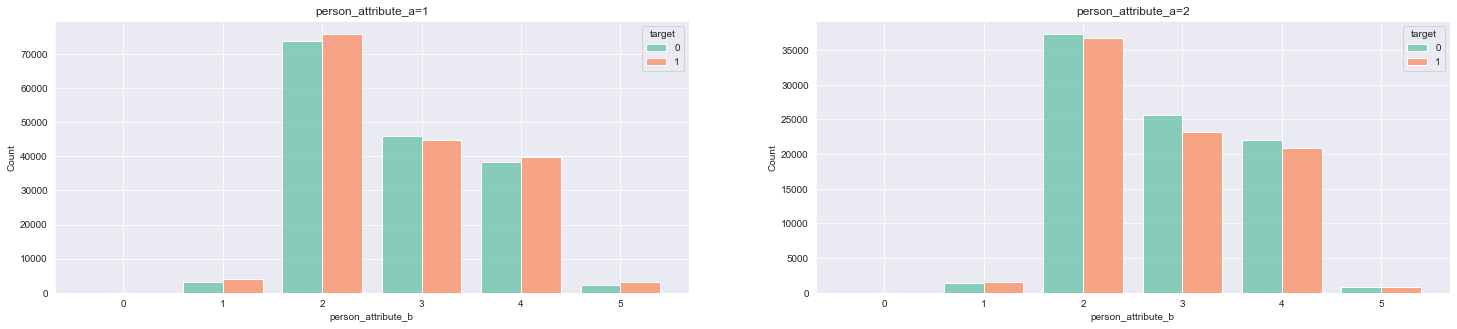

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

for i in range(2):
    sns.histplot(x ='person_attribute_b', hue='target', data = train[train['person_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(0,len(train['person_attribute_b'].unique()),1), title=f'person_attribute_a={i+1}')
plt.show()

In [69]:
corr_cols = ['person_attribute_a','person_attribute_a_1','person_attribute_b', 'person_prefer_c','person_prefer_e','contents_attribute_a','contents_attribute_c','contents_attribute_d','contents_attribute_e','contents_attribute_h','target']

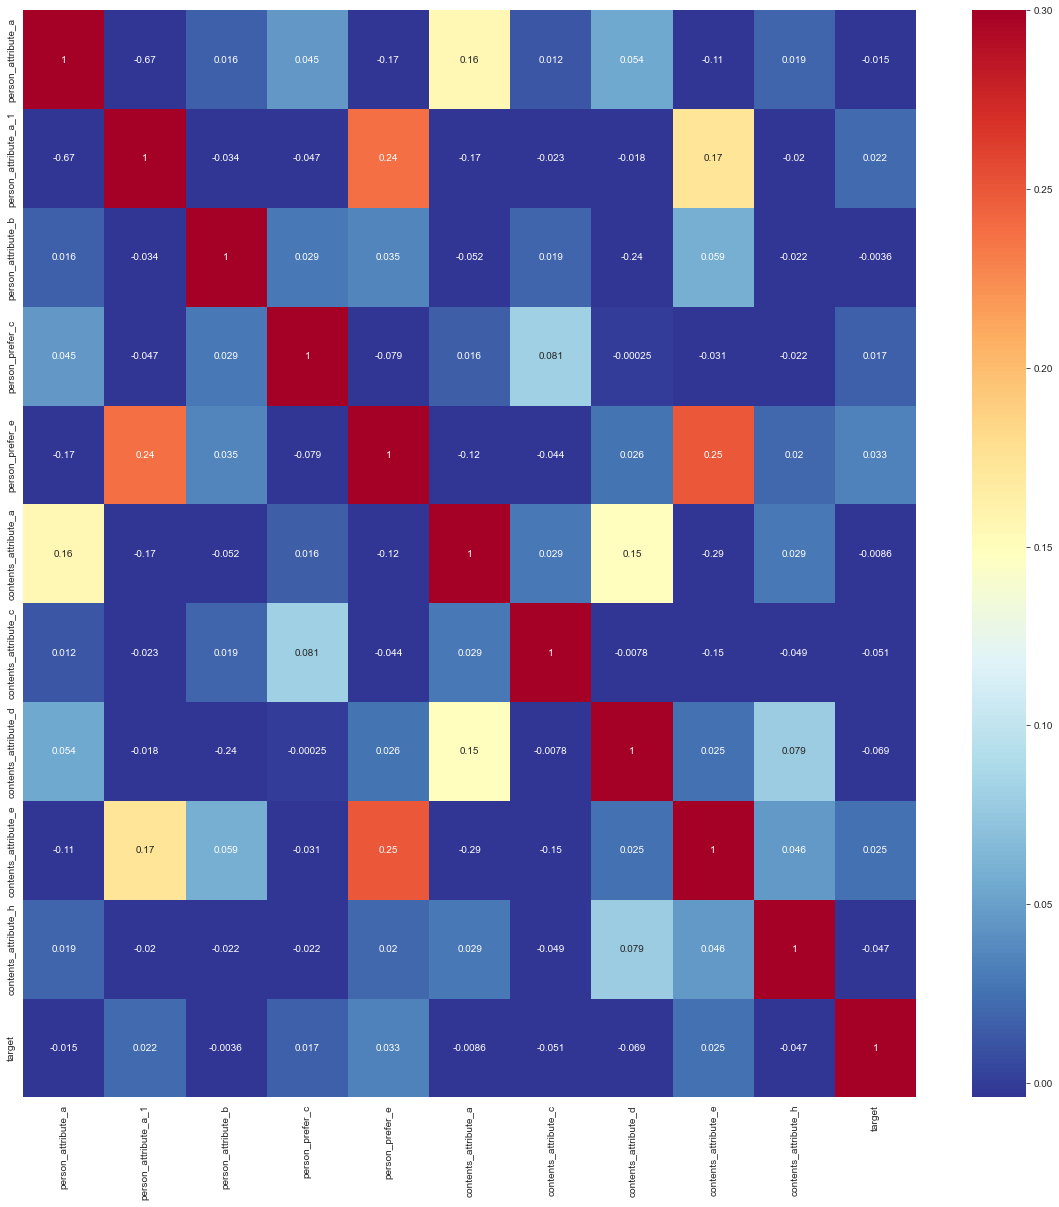

In [70]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(train[corr_cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

In [71]:
corr_cols = ['person_attribute_a','person_attribute_a_1','person_attribute_b', 'person_prefer_c','person_prefer_e','contents_attribute_i','contents_attribute_j_1','contents_attribute_j','contents_attribute_k','contents_attribute_l','contents_attribute_m','target']

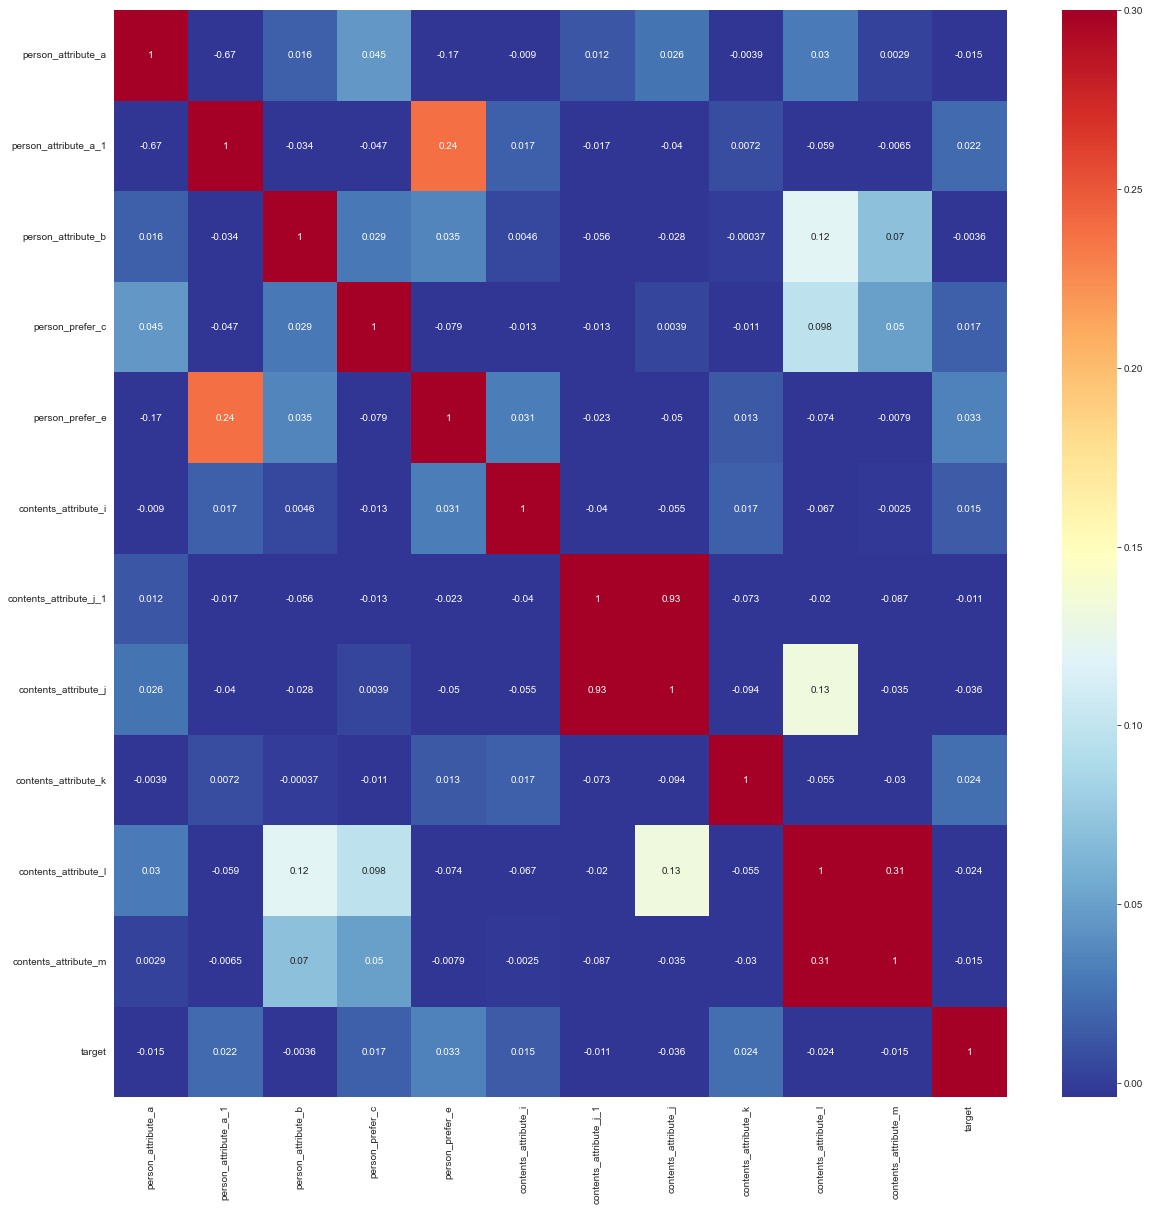

In [72]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(train[corr_cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

In [73]:
corr_cols = ['d_l_match_yn','person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','h_l_match_yn','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_a','contents_attribute_c','contents_attribute_d','contents_attribute_e','contents_attribute_h', 'target']

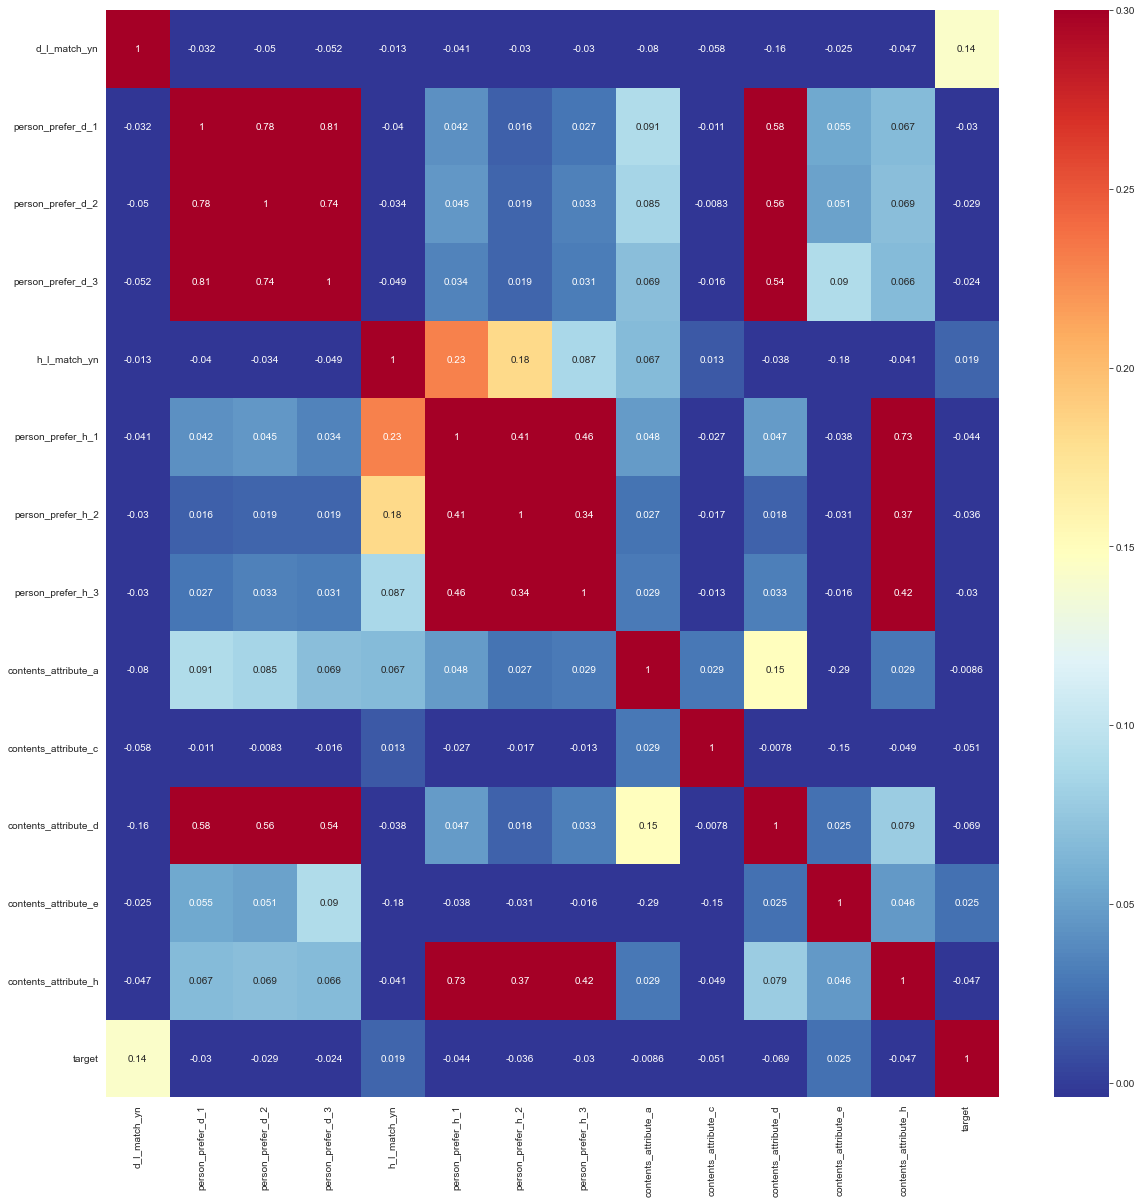

In [74]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(train[corr_cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

In [75]:
corr_cols = ['d_l_match_yn','person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','h_l_match_yn','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_i','contents_attribute_j_1','contents_attribute_j','contents_attribute_k','contents_attribute_l','contents_attribute_m', 'target']

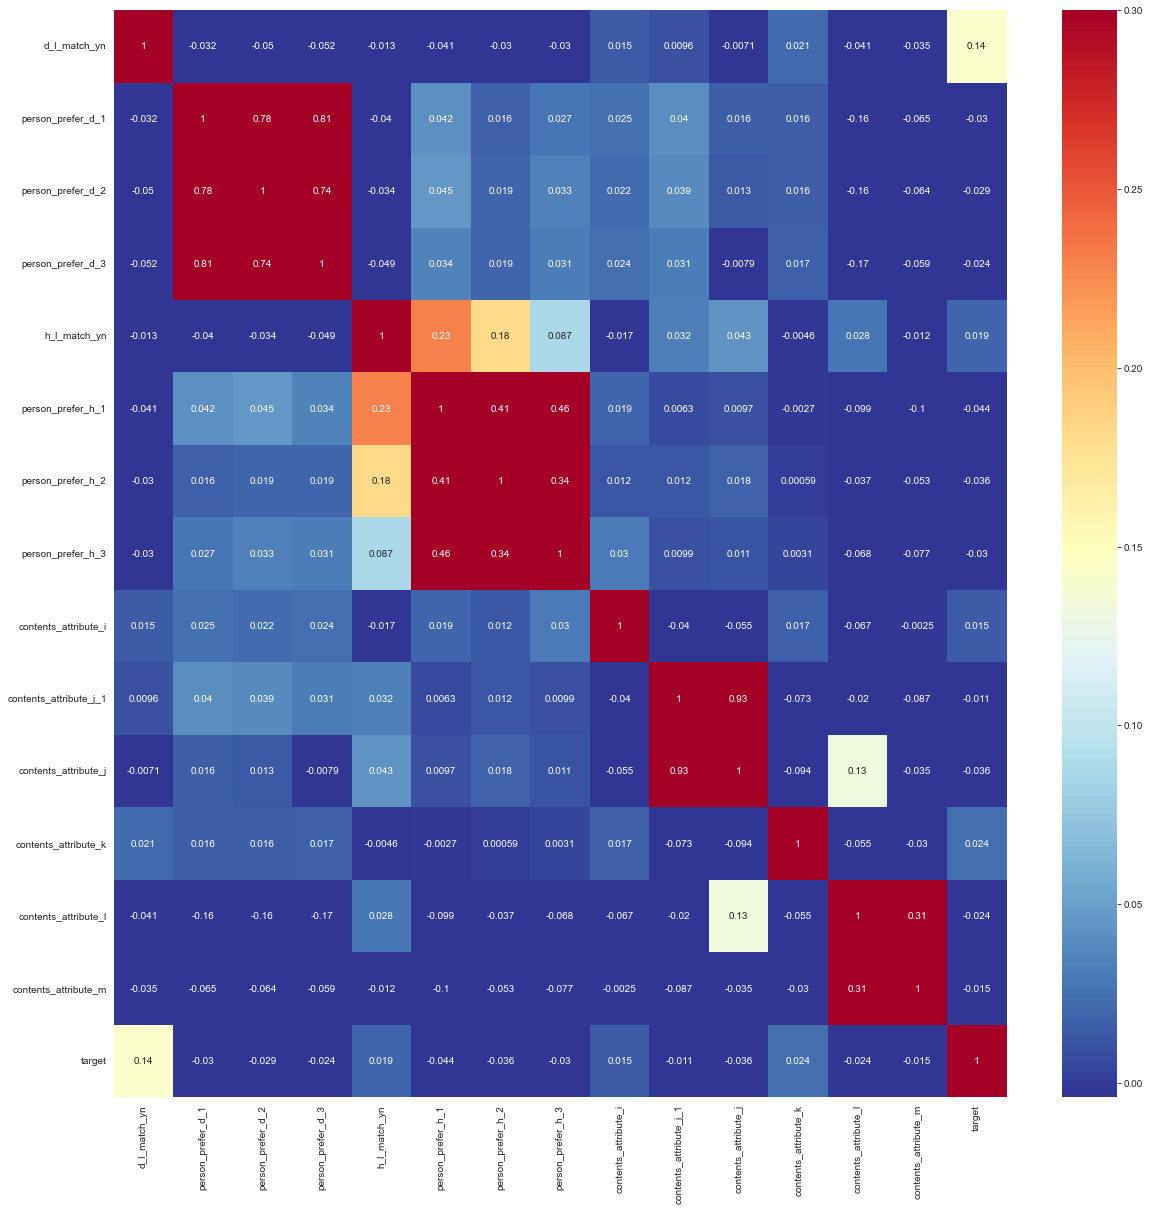

In [76]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(train[corr_cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

In [67]:
corr_cols = ['d_l_match_yn','d_m_match_yn', 'd_s_match_yn','person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','h_l_match_yn','h_m_match_yn','h_s_match_yn','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3', 'target']

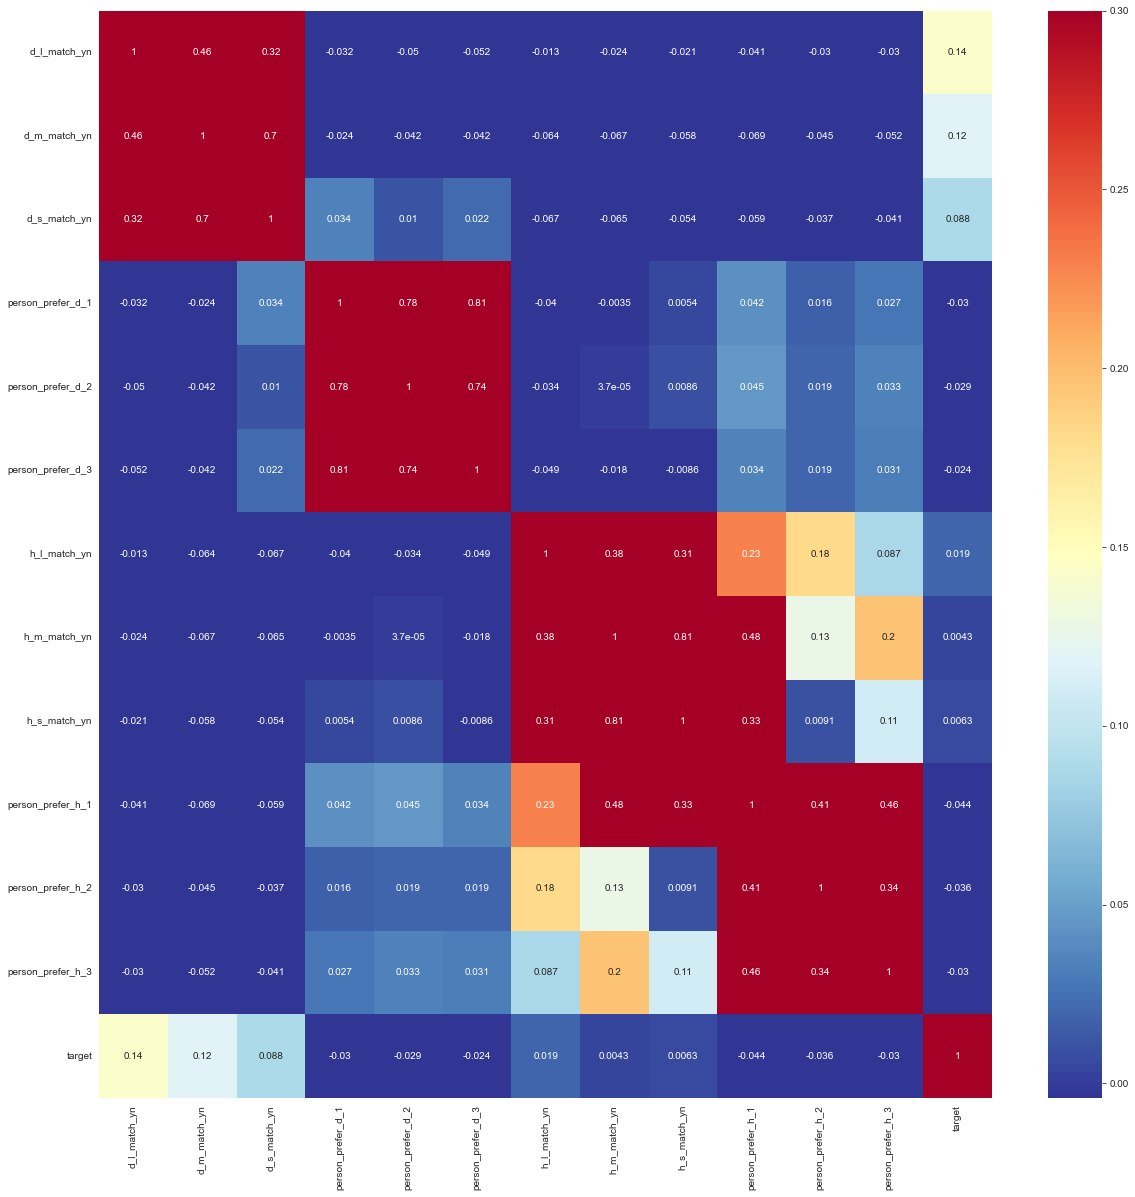

In [68]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(train[corr_cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

# 회원 선호 속성 e와 컨텐츠 속성 따른 target 값
## 1. 회원 선호 속성 e & 컨텐츠 속성 e

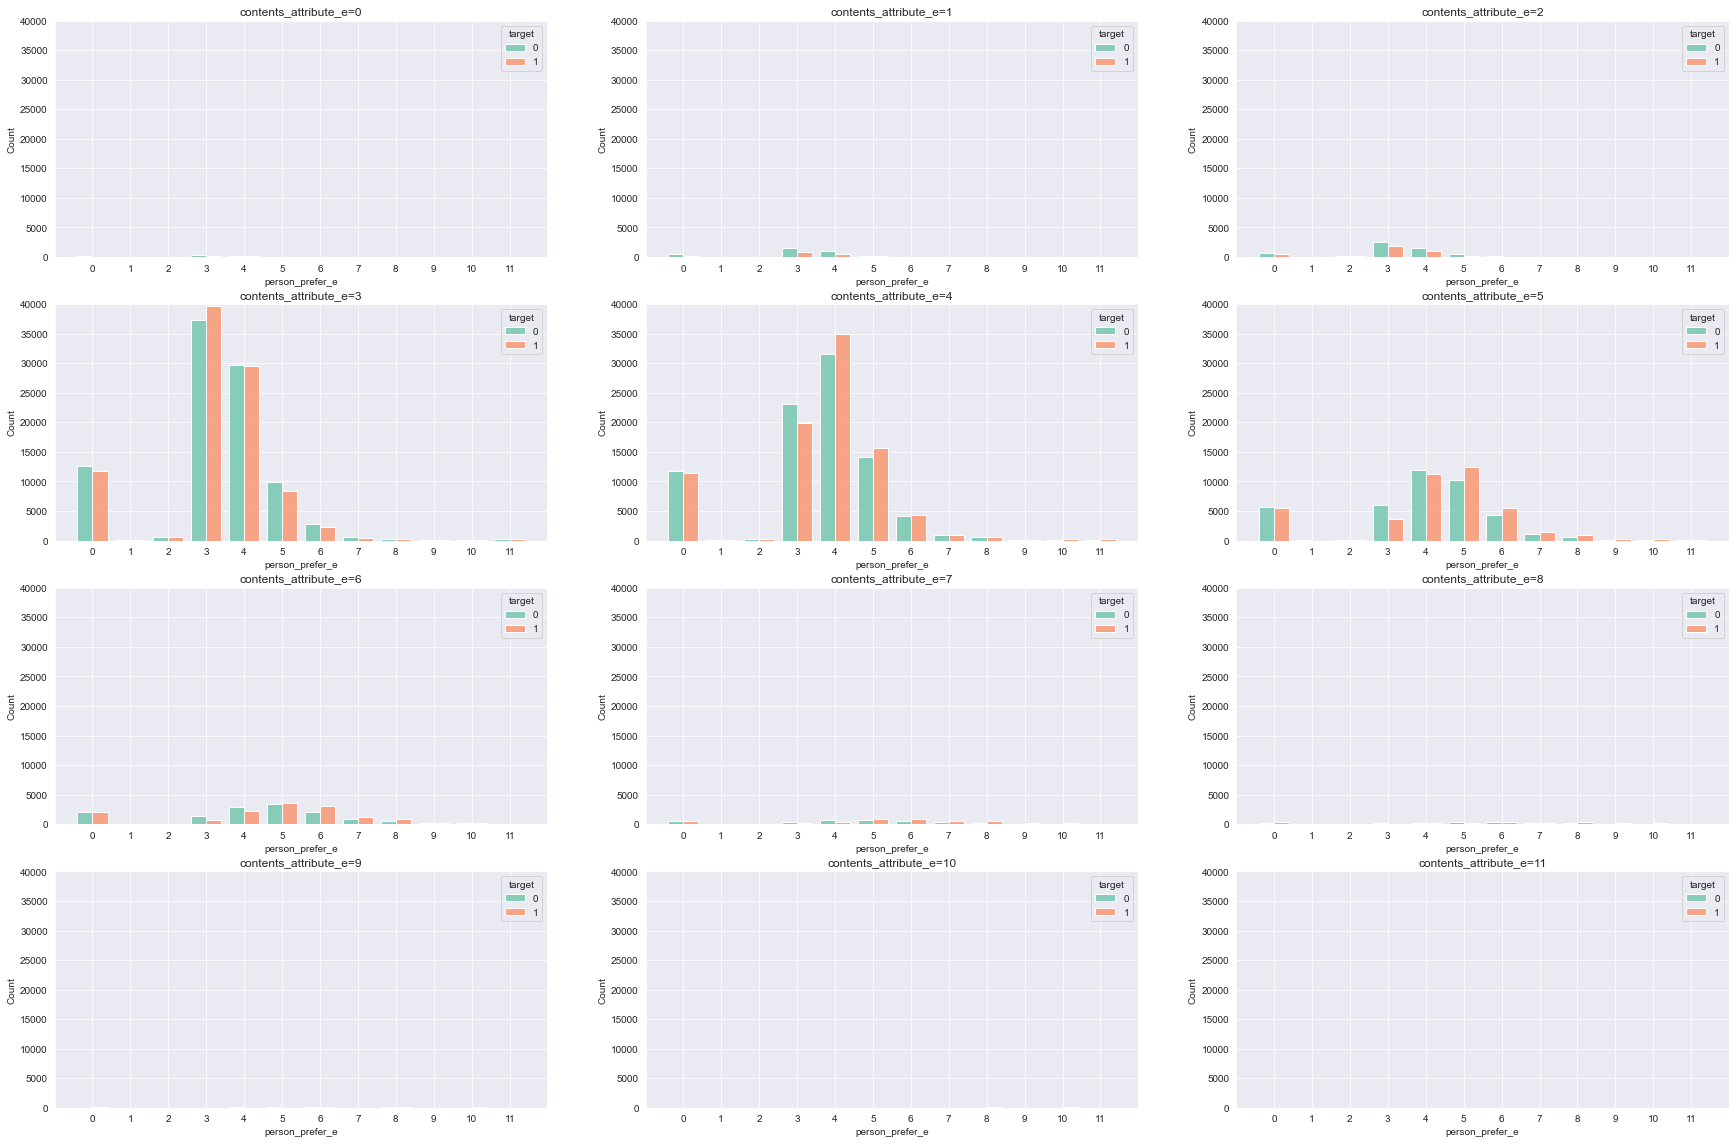

In [79]:
fig, ax = plt.subplots(nrows=(len(train['contents_attribute_e'].unique())//3), ncols=3, figsize=(30, 20))

for i in range(len(train['contents_attribute_e'].unique())):
    sns.histplot(x ='person_prefer_e', hue='target', data = train[train['contents_attribute_e']==i], ax=ax[i//3][i%3], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i//3][i%3].set(xticks=range(0,len(train['person_prefer_e'].unique()),1), ylim=[0,40000],title=f'contents_attribute_e={i}')
plt.show()

* 예상
    * 선호속성과 컨텐츠 속성의 값이 같으면 target=1이 높을 것이다
* 결과
    * 선호속성=0, 컨텐츠속성=0 일때  target=0이 두배이상 높음. 
    * 2~11 모두 선호속성과 컨텐츠속성이 같을때 target=1의 수가 월등히 높으며 7이상일 때는 6 ~ 11을 선호속성으로 선택한 사람들이 컨텐츠를 이용.
    * 컨텐츠속성8,9 일때 0을 선호한다고 한 사람들이 컨텐츠를 이용. 
    * 1,2를 선호하는 사람은 거의 없는것으로 보임
## 2. 회원 선호 속성 e & 컨텐츠 속성 a

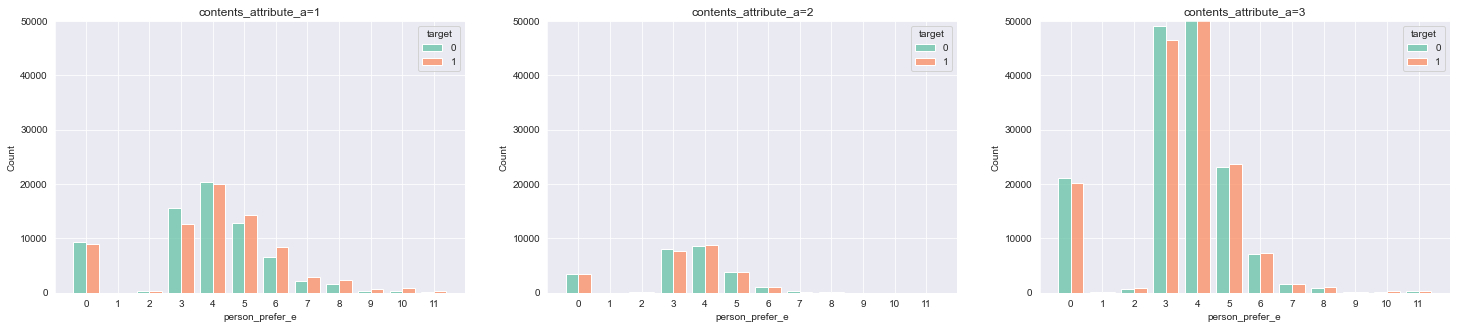

In [80]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

for i in range(3):
    sns.histplot(x ='person_prefer_e', hue='target', data = train[train['contents_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(0,len(train['person_prefer_e'].unique()),1), ylim=[0,50000], title=f'contents_attribute_a={i+1}')
plt.show()

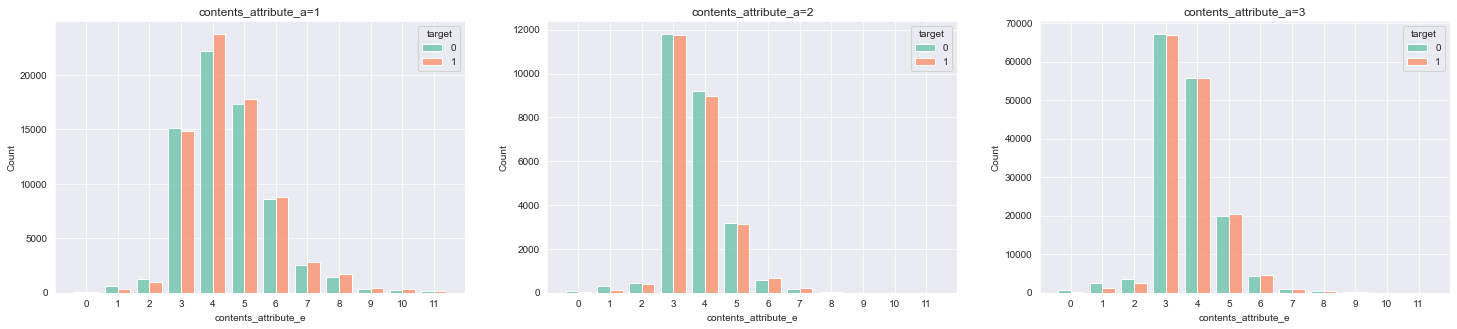

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 5))

for i in range(3):
    sns.histplot(x ='contents_attribute_e', hue='target', data = train[train['contents_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(0,len(train['contents_attribute_e'].unique()),1), title=f'contents_attribute_a={i+1}')
plt.show()

In [87]:
pd.crosstab(train.contents_attribute_e, train.contents_attribute_a, margins=True).style.background_gradient()

contents_attribute_a,1,2,3,All
contents_attribute_e,,,,
0,156,93,776,1025
1,917,444,3818,5179
2,2215,851,6348,9414
3,29986,23583,134024,187593
4,45911,18167,111550,175628
5,35131,6340,40213,81684
6,17423,1259,9094,27776
7,5408,366,1960,7734
8,3198,71,722,3991


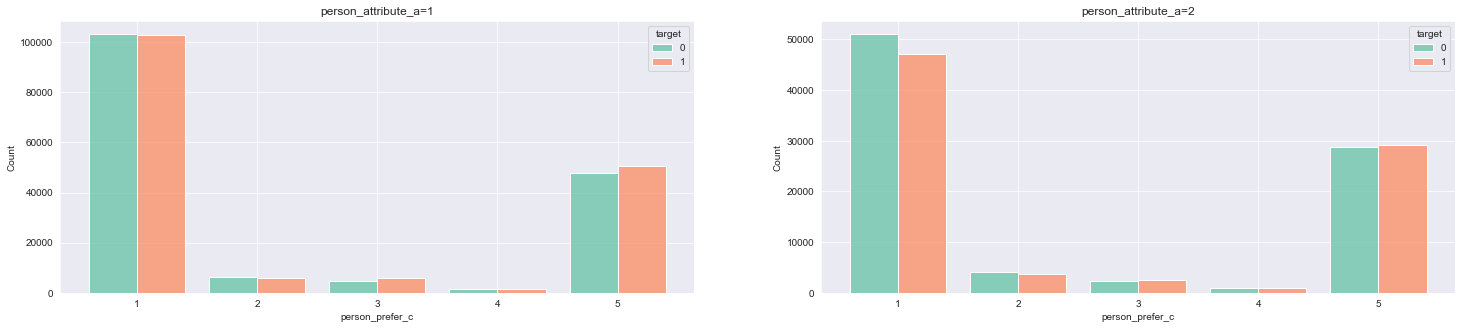

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 5))

for i in range(2):
    sns.histplot(x ='person_prefer_c', hue='target', data = train[train['person_attribute_a']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(1,len(train['person_prefer_c'].unique())+1,1), title=f'person_attribute_a={i+1}')
plt.show()

In [96]:
train.loc[train['target']==1, ['person_rn','contents_rn']]

,person_rn,contents_rn
id,,
0,618822,354805
5,836994,580234
7,763441,348156
17,584136,364871
18,549183,364871
...,...,...
501946,503156,285850
501947,676255,456996
501948,484528,293258


In [115]:
train.loc[(train['person_rn']==827703), ['d_l_match_yn','d_m_match_yn', 'd_s_match_yn','person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','contents_attribute_d']]

,d_l_match_yn,d_m_match_yn,d_s_match_yn,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,contents_attribute_d
id,,,,,,,
8431,True,False,False,145,46,147,136
24412,False,False,False,145,46,147,857
25373,False,False,False,145,46,147,857
45903,True,False,False,145,46,147,113
65186,False,False,False,145,46,147,265
86092,True,False,False,145,46,147,74
146414,True,False,False,145,46,147,144
148492,True,False,False,145,46,147,138
176993,True,False,False,145,46,147,136


In [ ]:
train.loc[(train['person_rn']==827703), ['d_l_match_yn','d_m_match_yn', 'd_s_match_yn','person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','contents_attribute_d']]

In [98]:
train.loc[train['target']==1, ['person_rn']].value_counts()

person_rn
827703       19
139379       17
1047079      16
352354       15
1016996      14
             ..
525391        1
525393        1
889915        1
525395        1
7             1
Length: 181498, dtype: int64

In [100]:
train.loc[train['target']==0, ['person_rn']].value_counts()

person_rn
419973       13
706365       12
499400       11
137203       11
833371       11
             ..
635374        1
635384        1
635385        1
635387        1
508645        1
Length: 172345, dtype: int64

### HappyNewYear님의 공유 코드 사용
* https://dacon.io/competitions/official/235863/codeshare/3877?page=1&dtype=recent

In [116]:
from typing import Dict
def add_code(
    df: pd.DataFrame,
    d_code: Dict[int, Dict[str, int]], 
    h_code: Dict[int, Dict[str, int]], 
    l_code: Dict[int, Dict[str, int]],
) -> pd.DataFrame:
    
    # Copy input data
    df = df.copy()   

    # D Code
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])
    
    return df

In [117]:
d_code = pd.read_csv('./_data/속성_D_코드.csv', index_col=0).T.to_dict()
h_code = pd.read_csv('./_data/속성_H_코드.csv', index_col=0).T.to_dict()
l_code = pd.read_csv('./_data/속성_L_코드.csv', index_col=0).T.to_dict()

df_train = pd.read_csv('./_data/train.csv')
df_test = pd.read_csv('./_data/test.csv')

df_train = add_code(df_train, d_code, h_code, l_code)
df_test = add_code(df_test, d_code, h_code, l_code)

In [119]:
train

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
id,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,False,False,False,1,4,3,5,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,False,False,False,True,True,False,1,3,4,1,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,False,False,False,True,False,False,2,0,3,5,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,False,False,False,True,False,False,2,0,2,5,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,True,True,True,False,False,False,1,3,4,5,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501946,False,False,False,True,False,False,1,1,2,2,...,2,354,147,1,5,65,503156,285850,2020-03-13 12:55:52,1
501947,True,True,False,True,False,False,1,6,2,1,...,2,163,120,1,4,142,676255,456996,2020-01-20 11:51:51,1
501948,True,True,True,True,False,False,1,7,4,1,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1


# 회원 선호 속성 c와 컨텐츠 속성 c에 따른 target 값

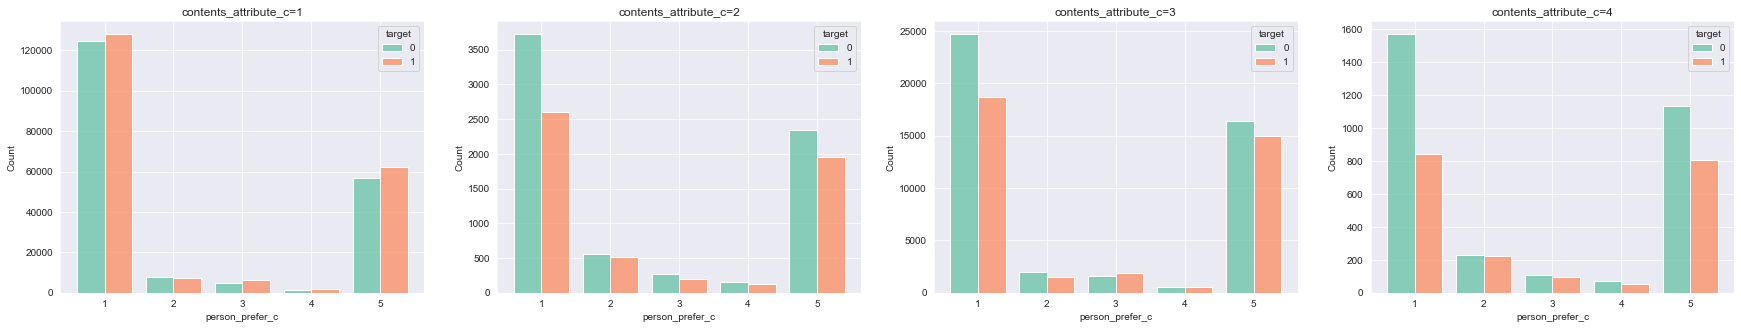

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30, 5))

for i in range(0,len(train['contents_attribute_c'].unique())):
    sns.histplot(x ='person_prefer_c', hue='target', data = train[train['contents_attribute_c']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(1,len(train['person_prefer_c'].unique())+1,1), title=f'contents_attribute_c={i+1}')
plt.show()

* 선호속성은 1 ~ 5까지 있는 반면 컨텐츠 속성 c는 1 ~ 4까지밖에 없음
    * 알파벳이 같으면 같은 속성을 의미하는줄 알았는데.. 아닌 것 같음
* 대부분 1,5 속성을 선호하며 컨텐츠속성이 2,3,4일 때 컨텐츠를 사용하지 않는 경우가 더 많다(특히 4)

In [71]:
test.contents_attribute_c.unique()

array([1, 3, 4, 2], dtype=int64)

In [72]:
test.person_prefer_c.unique()

array([1, 2, 5, 4, 3], dtype=int64)

# contents_attribute_j , contents_attribute_j_1 

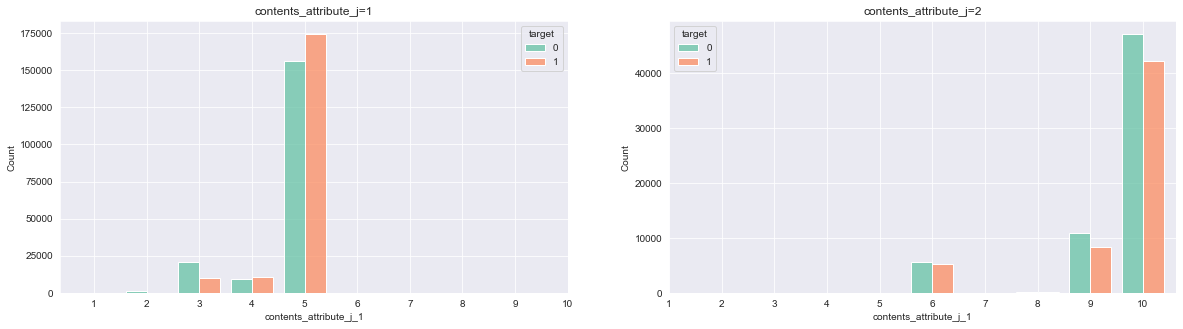

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

for i in range(0,len(train['contents_attribute_j'].unique())):
    sns.histplot(x ='contents_attribute_j_1', hue='target', data = train[train['contents_attribute_j']==i+1], ax=ax[i], 
                 multiple='dodge', element='bars', discrete=True, shrink=.8, palette='Set2')
    ax[i].set(xticks=range(1,len(train['contents_attribute_j_1'].unique())+2,1), title=f'contents_attribute_j={i+1}')
plt.show()

In [77]:
pd.crosstab(train.contents_attribute_j_1, train.contents_attribute_j, margins=True).style.background_gradient()

contents_attribute_j,1,2,All
contents_attribute_j_1,,,
1,65,0,65
2,1416,0,1416
3,30664,0,30664
4,19649,0,19649
5,330790,0,330790
6,0,10808,10808
8,0,137,137
9,0,19115,19115
10,0,89307,89307


* contents_attribute_j_1은 j=1,2로 완벽하게 나누어짐

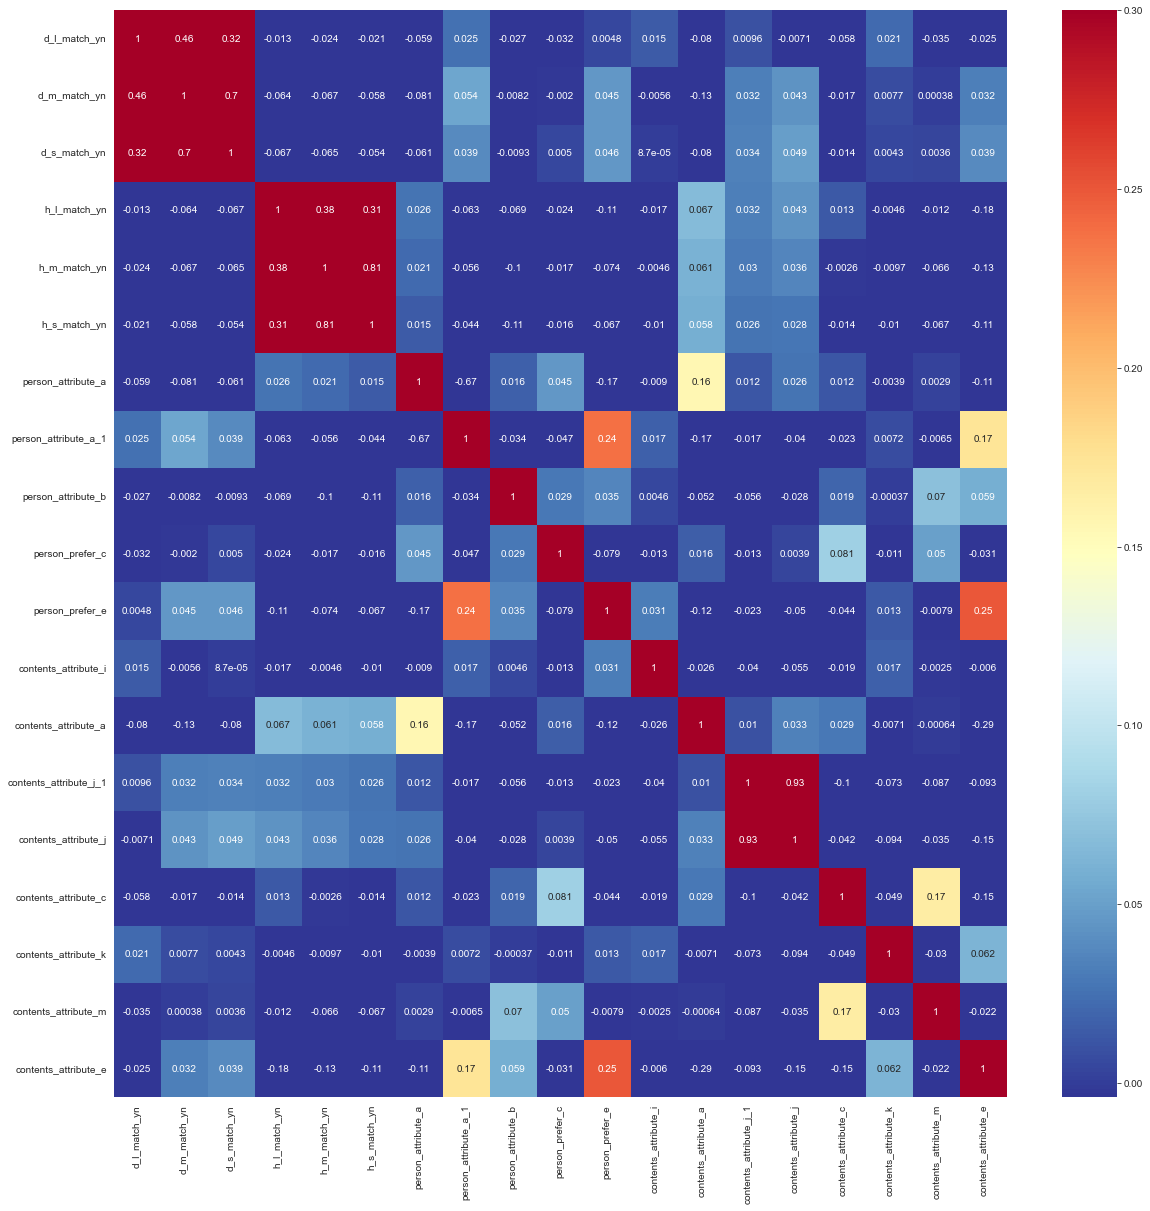

In [105]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(train[categorical_cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

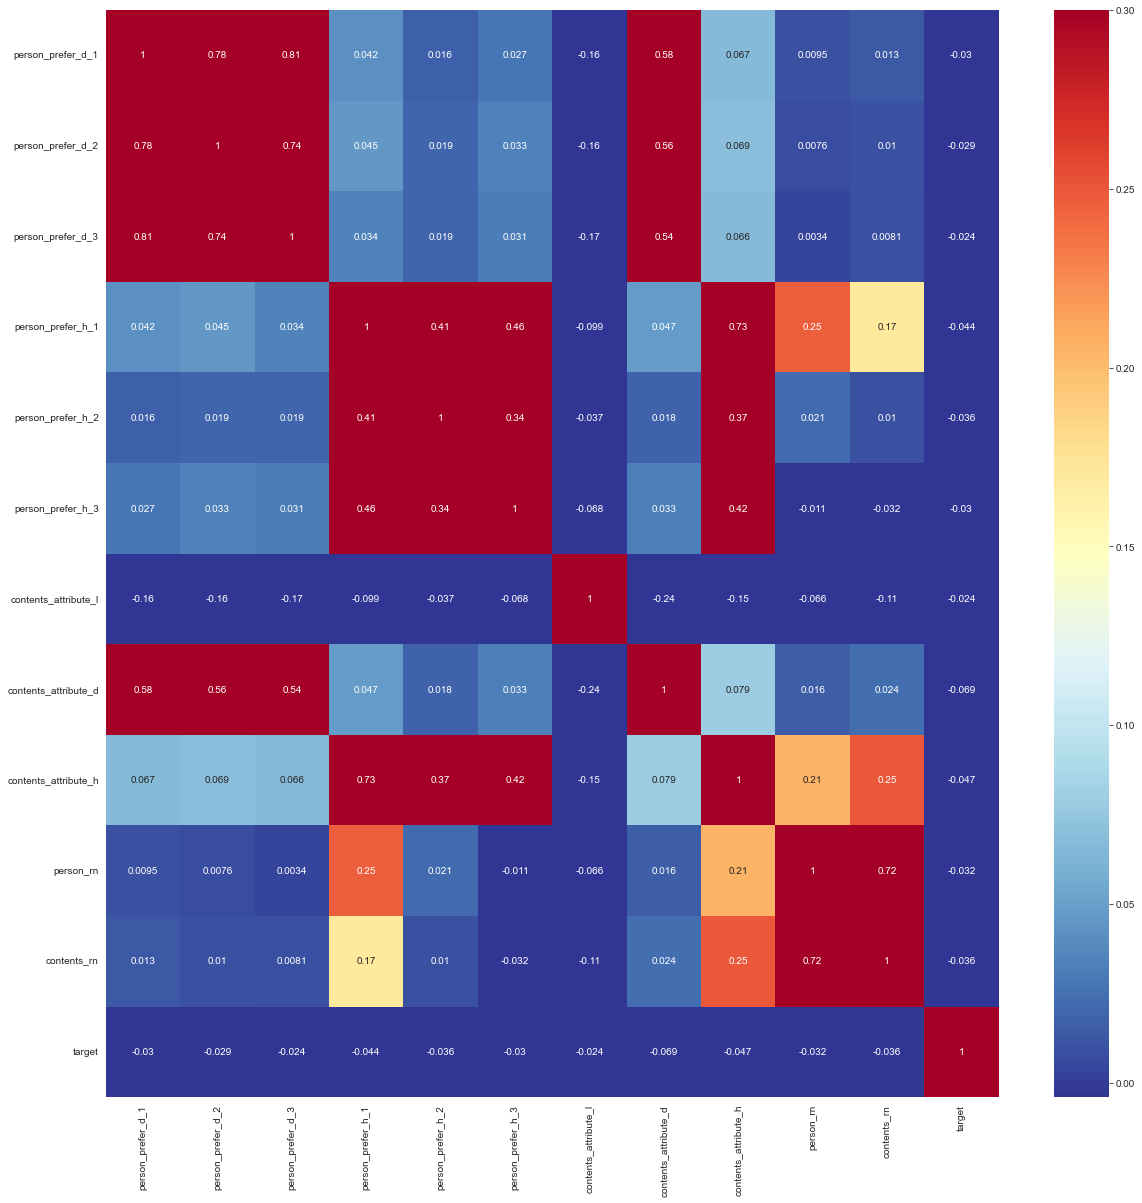

In [106]:
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(train[numerical_cols].corr(),cmap = plt.cm.RdYlBu_r, annot=True, vmin=-0.0040, vmax = 0.3)

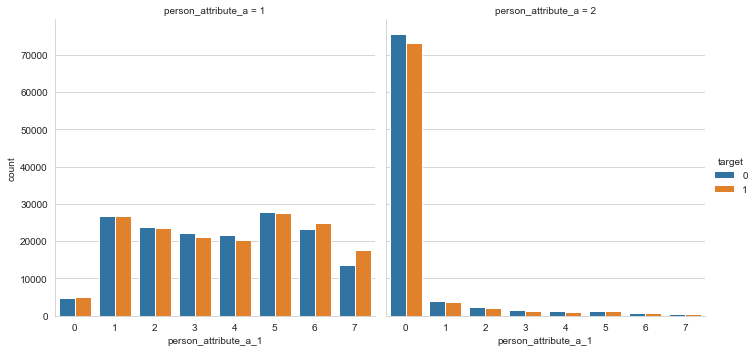

In [166]:
sns.catplot('person_attribute_a_1',col = 'person_attribute_a', 
            hue = 'target', kind='count', 
            data =train)

In [129]:
train[(train.target==1) & ((train.contents_attribute_h==train.person_prefer_h_1) | (train.contents_attribute_h==train.person_prefer_h_2) | (train.contents_attribute_h==train.person_prefer_h_3))]

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
id,,,,,,,,,,,,,,,,,,,,,
17,True,False,False,True,True,True,1,3,2,5,...,2,527,1230,1,6,139,584136,364871,2020-06-09 06:01:33,1
18,True,False,False,True,False,False,1,6,2,5,...,2,527,1230,1,6,139,549183,364871,2020-05-25 13:01:03,1
28,False,False,False,True,True,True,1,2,4,1,...,2,396,94,4,4,285,329471,190217,2020-08-18 15:52:51,1
41,True,True,False,True,True,True,2,0,4,5,...,2,163,93,1,1,285,322839,752937,2020-03-14 07:04:30,1
51,True,False,False,True,True,True,2,0,2,1,...,2,597,1085,5,4,109,608909,405568,2020-09-01 17:15:57,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501936,True,True,True,True,True,True,1,3,2,1,...,2,693,1227,1,3,213,896068,627683,2020-06-23 14:46:52,1
501937,True,True,False,True,True,True,1,5,2,5,...,2,693,1227,1,3,213,897060,627471,2020-06-04 17:53:02,1
501938,False,False,False,False,False,False,1,2,2,5,...,2,855,92,4,3,22,619954,70210,2020-08-11 15:58:12,1


In [130]:
train[(train.target==1) & ((train.contents_attribute_d==train.person_prefer_d_1) | (train.contents_attribute_d==train.person_prefer_d_2) | (train.contents_attribute_d==train.person_prefer_d_3))]

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
id,,,,,,,,,,,,,,,,,,,,,
0,True,True,True,False,False,False,1,4,3,5,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
41,True,True,False,True,True,True,2,0,4,5,...,2,163,93,1,1,285,322839,752937,2020-03-14 07:04:30,1
43,True,True,True,True,False,False,2,3,4,5,...,2,953,93,1,8,74,840297,581896,2020-07-28 22:56:32,1
44,True,False,False,False,False,False,1,4,2,5,...,1,1681,114,4,4,120,767179,534467,2020-02-02 17:22:25,1
47,True,False,False,True,False,False,1,2,3,1,...,2,825,114,1,3,76,860579,584547,2020-09-21 11:32:42,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501943,True,True,False,True,False,False,1,3,4,1,...,2,775,147,1,5,65,473936,288995,2020-05-14 20:34:36,1
501944,True,True,True,True,False,False,1,6,4,1,...,2,1110,147,1,5,65,476402,289697,2020-05-28 12:51:19,1
501948,True,True,True,True,False,False,1,7,4,1,...,2,438,147,2,7,65,484528,293258,2020-08-05 17:27:24,1


In [153]:
pd.crosstab(train.contents_attribute_a, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_a,,,
1,69917,71978,141895
2,25841,25360,51201
3,155348,153507,308855
All,251106,250845,501951


In [154]:
pd.crosstab(train.contents_attribute_c, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_c,,,
1,195623,205786,401409
2,7062,5397,12459
3,45299,37630,82929
4,3122,2032,5154
All,251106,250845,501951


In [155]:
pd.crosstab(train.contents_attribute_d, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_d,,,
4,5,0,5
5,17,18,35
7,10,0,10
8,197,234,431
9,48,59,107
10,90,165,255
11,11,15,26
12,126,235,361
13,42,40,82


In [156]:
pd.crosstab(trainfwd.contents_attribute_e, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_e,,,
0,781,244,1025
1,3347,1832,5179
2,5402,4012,9414
3,94057,93536,187593
4,87093,88535,175628
5,40346,41338,81684
6,13604,14172,27776
7,3647,4087,7734
8,1905,2086,3991


In [157]:
pd.crosstab(train.contents_attribute_h, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_h,,,
5,745,1108,1853
6,937,1457,2394
7,561,853,1414
8,619,1055,1674
9,414,643,1057
10,539,744,1283
11,370,441,811
12,402,548,950
13,304,310,614


In [158]:
pd.crosstab(train.contents_attribute_i, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_i,,,
1,59623,56650,116273
2,22551,22075,44626
3,168932,172120,341052
All,251106,250845,501951


In [159]:
pd.crosstab(train.contents_attribute_j_1, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_j_1,,,
1,25,40,65
2,1283,133,1416
3,20685,9979,30664
4,9227,10422,19649
5,156292,174498,330790
6,5543,5265,10808
8,77,60,137
9,10858,8257,19115
10,47116,42191,89307


In [160]:
pd.crosstab(train.contents_attribute_j, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_j,,,
1,187512,195072,382584
2,63594,55773,119367
All,251106,250845,501951


In [161]:
pd.crosstab(train.contents_attribute_k, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_k,,,
1,10336,8082,18418
2,240770,242763,483533
All,251106,250845,501951


In [162]:
pd.crosstab(train.contents_attribute_l, train.target, margins=True).style.background_gradient()

In [163]:
pd.crosstab(train.contents_attribute_m, train.target, margins=True).style.background_gradient()

target,0,1,All
contents_attribute_m,,,
1,134221,138664,272885
2,28544,28570,57114
3,9101,8845,17946
4,46236,40131,86367
5,33004,34635,67639
All,251106,250845,501951


In [ ]:
, 'person_prefer_c',
       'person_prefer_e', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 
       'contents_attribute_m', 'contents_attribute_e'